<a href="https://colab.research.google.com/github/huavinhkhang0405/Source-MVO-COA-portfolio/blob/master/BaoCao_THTTNT_Buoi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BÁO CÁO TUẦN 4

---



*   Họ tên: Hứa Vĩnh Khang
*   MSSV: 2001230385

---





### THUẬT TOÁN TÔ MÀU ĐỒ THỊ

---



## 1. Định nghĩa và mục đích
---


- **Khái niệm**: Tô màu đồ thị là việc gán nhãn (màu) cho các thành phần của một đồ thị (các đỉnh) sao cho thỏa mãn các điều kiện ràng buộc nhất định.
- **Quy tắc**: Hai đỉnh kề nhau bắt buộc phải khác màu.
- **Mục tiêu**: Tìm số lượng màu tối thiểu để thỏa mãn quy tắc trên

---






## 2. Cơ chế hoạt động

---
Cơ chế hoạt động thường dựa trên các phương pháp Tham lam (Greedy) hoặc Heuristic để tìm ra lời giải chấp nhận được (gần tối ưu).
1. Chọn đỉnh có bậc lớn nhất tô màu i.
2. Hạ bậc (Đỉnh đã tô màu: bậc = 0; Những đỉnh có liên hệ: bậc := bậc – 1)
1. Những đỉnh có liên hệ: bậc := bậc – 1
Bước 3: Đánh dấu các đỉnh liên hệ và cấm tô màu i.



##3. Ví dụ minh họa

---



# BÀI 1

Khai báo các thư viện sử dụng

---



In [1]:
import matplotlib.pyplot as plt # Thư viện dùng để vẽ đồ thị
import networkx as nx # Thư viện dùng để tính toán và thao tác trên đồ thị



---
Hàm load đồ thị (Dữ liệu file txt)

---



In [2]:
def loadGraph(file):
  matrix = []
  try:
        with open(file, 'r', encoding='utf-8') as f:
            for line in f:
                # 1. Làm sạch
                clean_line = line.replace('[', ' ').replace(']', ' ').replace(',', ' ')

                # 2. Chuyển thành list số nguyên (đây là 1 hàng của ma trận)
                row_matrix = [int(x) for x in clean_line.split()]

                # Nếu dòng rỗng thì bỏ qua
                if not row_matrix:
                    continue

                # 3. Chuyển từ Hàng Ma trận sang Danh sách kề
                neighbors = []
                for node_index, val in enumerate(row_matrix):
                    if val == 1:
                        neighbors.append(node_index)

                matrix.append(neighbors)

        return matrix

  except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại {file}")
        return []
  except Exception as e:
        print(f"Lỗi đọc file: {e}")
        return []



---

Tạo đồ thị (Chuyển sang dạng txt)

---



In [3]:
G = [[ 0, 1, 1, 0, 1, 0],
     [ 1, 0, 1, 1, 0, 1],
     [ 1, 1, 0, 1, 1, 0],
     [ 0, 1, 1, 0, 0, 1],
     [ 1, 0, 1, 0, 0, 1],
     [ 0, 1, 0, 1, 1, 0]]

# Lệnh ghi ra file txt
with open('graph.txt', 'w', encoding='utf-8') as f:
    for row in G:
        f.write(str(row) + '\n')

print("Đã tạo file graph.txt thành công!")

Đã tạo file graph.txt thành công!




---

Thuật toán tô màu đồ thị

---



In [7]:
def graph_coloring_algorithm(G, nodes):
  # Map node characters to their integer indices
  t_ = {}
  for i in range(len(G)):
      t_[nodes[i]] = i

  # Calculate the degree of each node (number of neighbors)
  # G is an adjacency list, so degree is len(G[i])
  degree = []
  for i in range(len(G)):
      degree.append(len(G[i])) # FIX 1: Correct degree calculation for adjacency list

  # Define the standard color palette (lowercase for consistency)
  initial_colors = ['red', 'green', 'blue', 'orange']

  # Initialize available colors for each node
  colorDict = {}
  for i in range(len(G)):
      colorDict[nodes[i]] = list(initial_colors) # FIX 4: Use consistent lowercase colors and a copy

  # Sort nodes by degree in descending order
  # This creates a list of (degree, original_index) tuples
  nodes_with_degrees = []
  for i in range(len(G)):
      nodes_with_degrees.append((degree[i], i))

  # Sort these tuples based on degree (descending)
  nodes_with_degrees.sort(key=lambda x: x[0], reverse=True)

  # Extract the sorted node characters based on sorted indices
  sortedNode_chars = [] # List of node characters ('A', 'B', ...)
  for _, node_idx in nodes_with_degrees:
      sortedNode_chars.append(nodes[node_idx])
  # FIX 2: Corrected and simplified sorting logic

  # Coloring process
  theSolution = {} # Stores final color for each node char, e.g., {'A': 'red'}
  final_colors_indices = [0] * len(G) # Stores final color index for each node index

  # Create a map from color name to its index in the palette
  local_palette_map = {color: idx for idx, color in enumerate(initial_colors)}

  for n_char in sortedNode_chars: # n_char is the character of the current node ('A', 'B', ...)
      n_idx = t_[n_char] # Get the integer index of the current node

      # Find the first available color for the current node
      assigned_color = None
      if colorDict[n_char]: # Check if there are available colors
          assigned_color = colorDict[n_char][0]
      else:
          # This means no color could be assigned from the palette.
          # For robustness, we could assign a default error color or raise an exception.
          # For this problem, we'll assume a color is always found within the given palette.
          print(f"Warning: Node {n_char} could not be colored with available palette.")
          assigned_color = 'black' # Fallback color

      theSolution[n_char] = assigned_color
      # Store the color index for drawing
      if assigned_color in local_palette_map:
          final_colors_indices[n_idx] = local_palette_map[assigned_color]
      else:
          # If fallback color was used, it won't be in local_palette_map, handle appropriately
          final_colors_indices[n_idx] = len(initial_colors) # Assign an index beyond known palette, draw_graph handles modulo

      # Propagate color constraints to neighbors
      # G[n_idx] gives a list of integer indices of neighbors
      for neighbor_idx in G[n_idx]: # Iterate through each neighbor's index
          neighbor_char = nodes[neighbor_idx] # Get the character of the neighbor
          # If the assigned color is in the neighbor's available colors, remove it
          if assigned_color in colorDict[neighbor_char]:
              colorDict[neighbor_char].remove(assigned_color)
  # FIX 3: Corrected loop for neighbors and color removal logic

  return final_colors_indices # FIX 5: Return the list of color indices



---

Hàm vẽ đồ thị

---



In [4]:
def draw_graph(graph_adj, colors_idx, nodes):
  palette = ['red', 'green', 'blue', 'orange']
  final_node_colors = []

  for i in range(len(graph_adj)):
        c_id = colors_idx[i]

        # Nếu màu vượt quá bảng màu thì quay vòng lại
        c_name = palette[c_id % len(palette)]
        final_node_colors.append(c_name)

  G_visual = nx.Graph()

  # Chuyển đổi từ Danh sách kề sang NetworkX Graph
  for u, neighbors in enumerate(graph_adj):
        for v in neighbors:
            if u < v: # Chỉ thêm cạnh 1 lần (tránh trùng lặp trong đồ thị vô hướng)
                G_visual.add_edge(nodes[u], nodes[v])
  plt.figure(figsize=(8, 6))

  # seed=42 giúp hình dáng đồ thị cố định, không bị nhảy lung tung mỗi lần chạy
  pos = nx.spring_layout(G_visual, seed=42)
  nx.draw(G_visual, pos,
            with_labels=True,
            node_color=final_node_colors, # Mảng màu đã chuẩn bị
            node_size=2000,
            font_color='white',
            font_weight='bold',
            edge_color='gray',
            width=1.5) # Độ dày cạnh

  plt.title("Kết quả Tô màu Đồ thị")
  plt.show()



---
Hàm thực thi chương trình chính
---



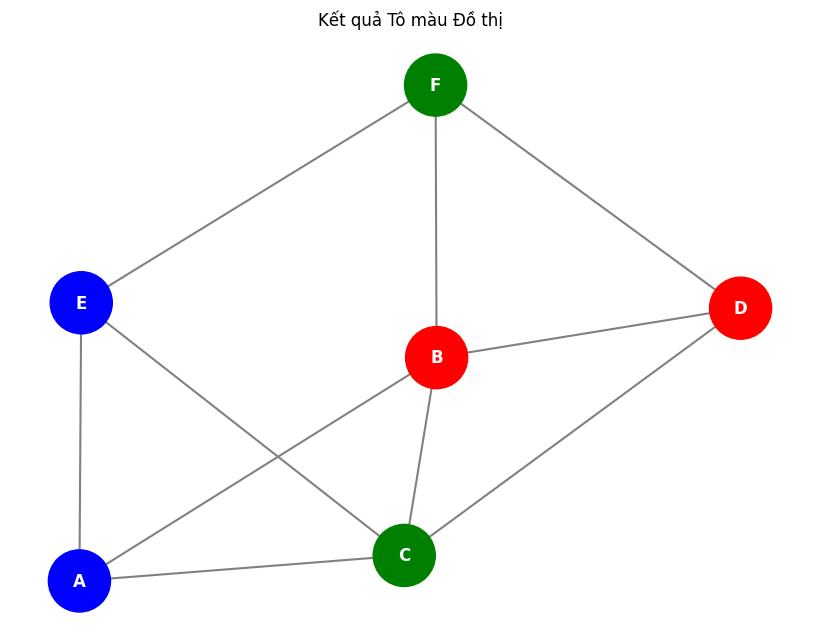

In [8]:
def main():
  graph_data_path = 'graph.txt'
  nodes = 'ABCDEF'

  # Load dữ liệu từ file graph.txt
  graph_data = loadGraph(graph_data_path)
  if not graph_data:
      print("Lỗi đọc file!")
      return

  # Chạy thuật toán tô màu
  colors_idx = graph_coloring_algorithm(graph_data, nodes)

  # Vẽ đồ thị
  draw_graph(graph_data, colors_idx, nodes)

if __name__ == '__main__':
  main()



---
## BÀI 2
---

